# DIP Project

# Umais Nisar, 19I-0573

In [2]:
# Importing libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Getting the image
img = cv2.imread('test_image.jpg')
lane_img = np.copy(img)

## Canny Edge Detection

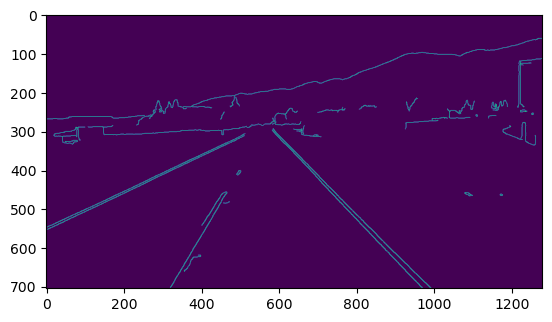

In [3]:
# Define a function to perform Canny edge detection on an image
def canny_detection(img):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray, (5,5), 0)
    canny = cv2.Canny(blur, 50, 150)
    return canny

canny_img = canny_detection(lane_img)
imgplot = plt.imshow(canny_img)
plt.show()

## Region of interest

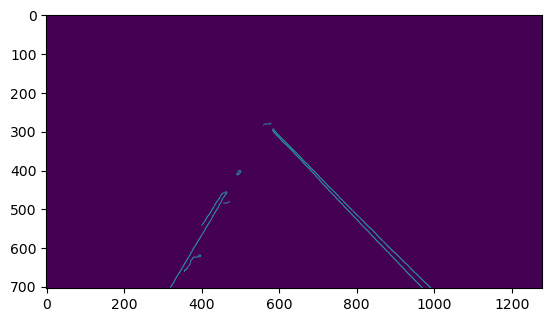

In [4]:
# Define a function to select the region of interest in the image
def region_of_interest(img):
    height = img.shape[0]
    width = img.shape[1]
    mask = np.zeros_like(img)
    vertices = np.array([[(290, height), (570,270), (1000,height)]], np.int32)
    cv2.fillPoly(mask, vertices, 255)
    masked_img = cv2.bitwise_and(img, mask)
    return masked_img

cropped_canny = region_of_interest(canny_img)
imgplot = plt.imshow(cropped_canny)
plt.show()

# Hough Transformation to detect lines

In [11]:
# Define a function to display the detected lines on the image
def display_detected_lines(img, lines):
    line_img = np.zeros_like(img)
    if lines is not None:
        for line in lines:
            for x1, y1, x2, y2 in line:
                cv2.line(line_img,(x1,y1),(x2,y2),(255,0,0),10)
    return line_img

# Detect lines in the image using Hough transform and draw the lines on the image
lines = cv2.HoughLinesP(cropped_canny, 2, np.pi/180, 100, np.array([]), minLineLength=40, maxLineGap=5)

# Define a function to calculate the coordinates of the detected lines
def calculate_coordinates(image, line):
    slope, intercept = line
    y1 = int(image.shape[0])
    y2 = int(y1*3/5)
    x1 = int((y1-intercept)/slope)
    x2 = int((y2-intercept)/slope)
    return [[x1, y1, x2, y2]]

# Define a function to obtain a single line for both left and right
def get_average_slope_intercept(img, lines):
    left_fit = []
    right_fit = []
    if lines is None:
        return None
    for line in lines:
        for x1, y1, x2, y2 in line:
            fit = np.polyfit((x1,x2), (y1,y2), 1)
            slope = fit[0]
            intercept = fit[1]
            if slope < 0:
                left_fit.append((slope,intercept))
            else:
                right_fit.append((slope,intercept))
    left_fit_avg = np.average(left_fit, axis = 0)
    right_fit_avg = np.average(right_fit, axis = 0)
    left_line = calculate_coordinates(img, left_fit_avg)
    right_line = calculate_coordinates(img, right_fit_avg)
    averaged_lines = [left_line, right_line]
    return averaged_lines

averaged_lines = get_average_slope_intercept(img, lines)
line_img = display_detected_lines(lane_img, averaged_lines)
final_img = cv2.addWeighted(lane_img, 0.8, line_img, 1, 0)

# Display the final image with detected lanes
cv2.imshow("Detected Lanes", final_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

TypeError: cannot unpack non-iterable numpy.float64 object

## Lane detection on video

In [10]:
cap = cv2.VideoCapture('test2.mp4')
while(cap.isOpened()):
    _, frame = cap.read()
    canny_image = canny_detection(frame)
    cropped_canny = region_of_interest(canny_image)
    lines = cv2.HoughLinesP(cropped_canny, 2, np.pi/180, 100, np.array([]), minLineLength=40,maxLineGap=5)
    averaged_lines = get_average_slope_intercept(frame, lines)
    line_image = display_detected_lines(frame, averaged_lines)
    final_image = cv2.addWeighted(frame, 0.8, line_image, 1, 1)
    cv2.imshow("result", final_image)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

TypeError: cannot unpack non-iterable numpy.float64 object